# Seasonal Autoregressive Integrated Moving Average

### Predicting seasonal time series forcasting

### What is SARIMA?
SARIMA is Seasonal ARIMA, or simply put, ARIMA with a seasonal component. As mentioned above, ARIMA is a statistical analysis model that uses time-series data to either better understand the data set or to predict future trends. It consists of 3 components –

### Component	
<br>
1. Autoregressive:	A model that uses the dependent relationship between an observation and some number of lagged observations.
<br>
<br>
2. Integrated:	The use of differencing of raw observations (e.g. subtracting an observation from observation at the previous time step) in order to make the time series stationary.
<br>
<br>
3. Moving Average:	A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [ ]:
#!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from pmdarima.model_selection import train_test_split

Link to dataset:
https://data.boston.gov/dataset/shots-fired

In [ ]:
shots_fired = pd.read_csv("/path to dataset")

In [ ]:
# Convert the incident_date column to a datetime object
shots_fired['incident_date'] = pd.to_datetime(shots_fired['incident_date'])

# Resample the data to daily counts
daily_counts = shots_fired.resample('D', on='incident_date').size()

# Train-test split
train, test = train_test_split(daily_counts, test_size=0.2)

# Fit a SARIMA model
model = pm.auto_arima(train, seasonal=True, m=7, stepwise=True, suppress_warnings=True)
predictions = model.predict(len(test))

In [ ]:
# Evaluate the model (e.g., using mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predictions)

# Extend the date range for future predictions
future_steps = 365  # Number of days into the future
future_dates = pd.date_range(test.index[-1], periods=future_steps + 1, closed='right')
future_predictions = model.predict(len(test) + future_steps)

In [1]:
# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(test.index, test, label='Actual Data', linewidth=2)
plt.plot(test.index, predictions, label='Predicted Data', linewidth=2)
plt.plot(future_dates, future_predictions[-future_steps:], label='Future Predictions', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Gun Violence Incidents')
plt.title('Gun Violence Incidents in Boston: Actual vs. Predicted')
plt.legend()
plt.grid()
plt.show()

### Sample graph

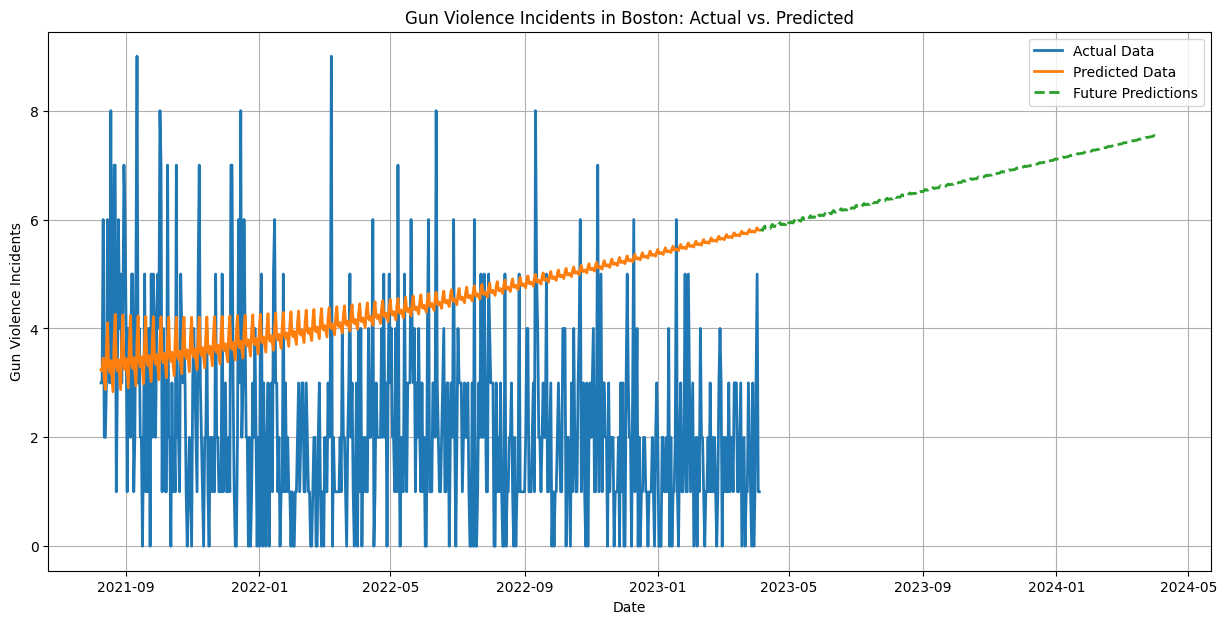